## Analysis and Visualization

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # settings for ignoring warnings

### Loading Data

In [2]:
# Loading data
data = pd.read_csv(r"C:\Users\sukhd\OneDrive\Desktop\Summer Training\Capstone Project\Autism_dataset_cleaned.csv")
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jaundice,Autism,Country_of_res,Used_app_before,Result,Relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.17270,f,Unknown,no,no,Austria,no,6.35117,Self,0
1,0,0,0,0,0,0,0,0,0,0,47.75050,m,Unknown,no,no,India,no,2.25519,Self,0
2,1,1,1,1,1,1,1,1,1,1,7.38037,m,White-European,no,yes,United States,no,14.85150,Self,1
3,0,0,0,0,0,0,0,0,0,0,23.56190,f,Unknown,no,no,United States,no,2.27662,Self,0
4,0,0,0,0,0,0,0,0,0,0,43.20580,m,Unknown,no,no,South Africa,no,-4.77729,Self,0


In [3]:
# Creating data back-up
df = data.copy()

# Exploring data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         798 non-null    int64  
 1   A2_Score         798 non-null    int64  
 2   A3_Score         798 non-null    int64  
 3   A4_Score         798 non-null    int64  
 4   A5_Score         798 non-null    int64  
 5   A6_Score         798 non-null    int64  
 6   A7_Score         798 non-null    int64  
 7   A8_Score         798 non-null    int64  
 8   A9_Score         798 non-null    int64  
 9   A10_Score        798 non-null    int64  
 10  Age              798 non-null    float64
 11  Gender           798 non-null    object 
 12  Ethnicity        798 non-null    object 
 13  Jaundice         798 non-null    object 
 14  Autism           798 non-null    object 
 15  Country_of_res   798 non-null    object 
 16  Used_app_before  798 non-null    object 
 17  Result          

### Age Distribution by ASD diagnosis

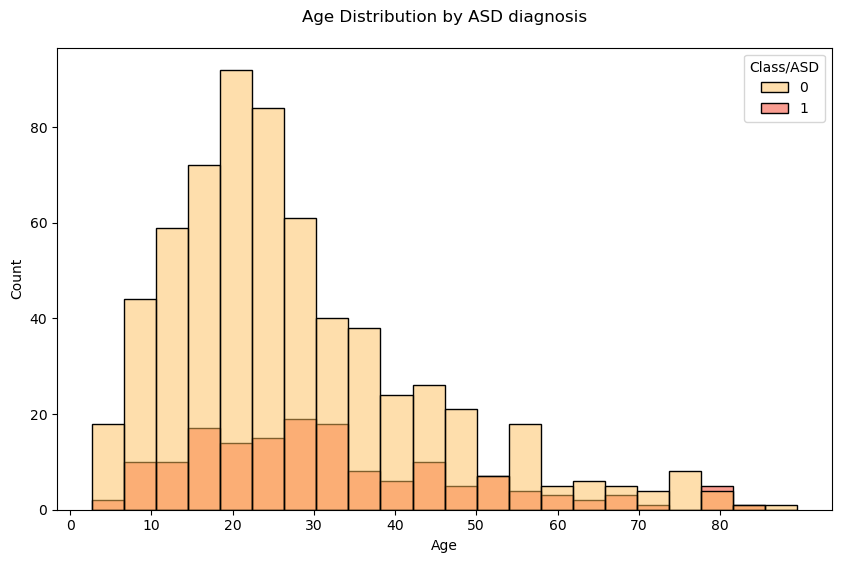

In [4]:
# Histogram for Age distribution by ASD diagnosis
fig, ax = plt.subplots(1,1, figsize = (10,6))
sns.histplot(x = df['Age'], hue = df['Class/ASD'], ax = ax, palette = 'YlOrRd')
ax.set_xticks(np.arange(0, df['Age'].max(), 10))
plt.title("Age Distribution by ASD diagnosis\n")
plt.show()

### ASD Classification by Gender

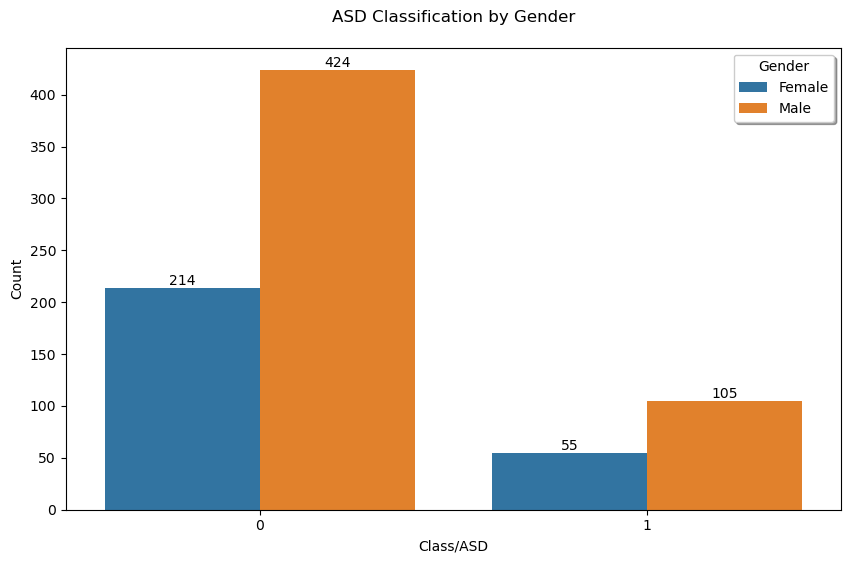

In [5]:
# ASD classification by gender
fig, ax = plt.subplots(1,1, figsize = (10,6))
sns.countplot(hue = df['Gender'], x = df['Class/ASD'], ax = ax)

# Set count to bar labels
for cont in ax.containers:
    ax.bar_label(cont)
ax.set_ylabel("Count")
ax.legend(title = "Gender", labels = ['Female', 'Male'], shadow = True)
plt.title("ASD Classification by Gender\n")
plt.show()

### Relation of Country with ASD

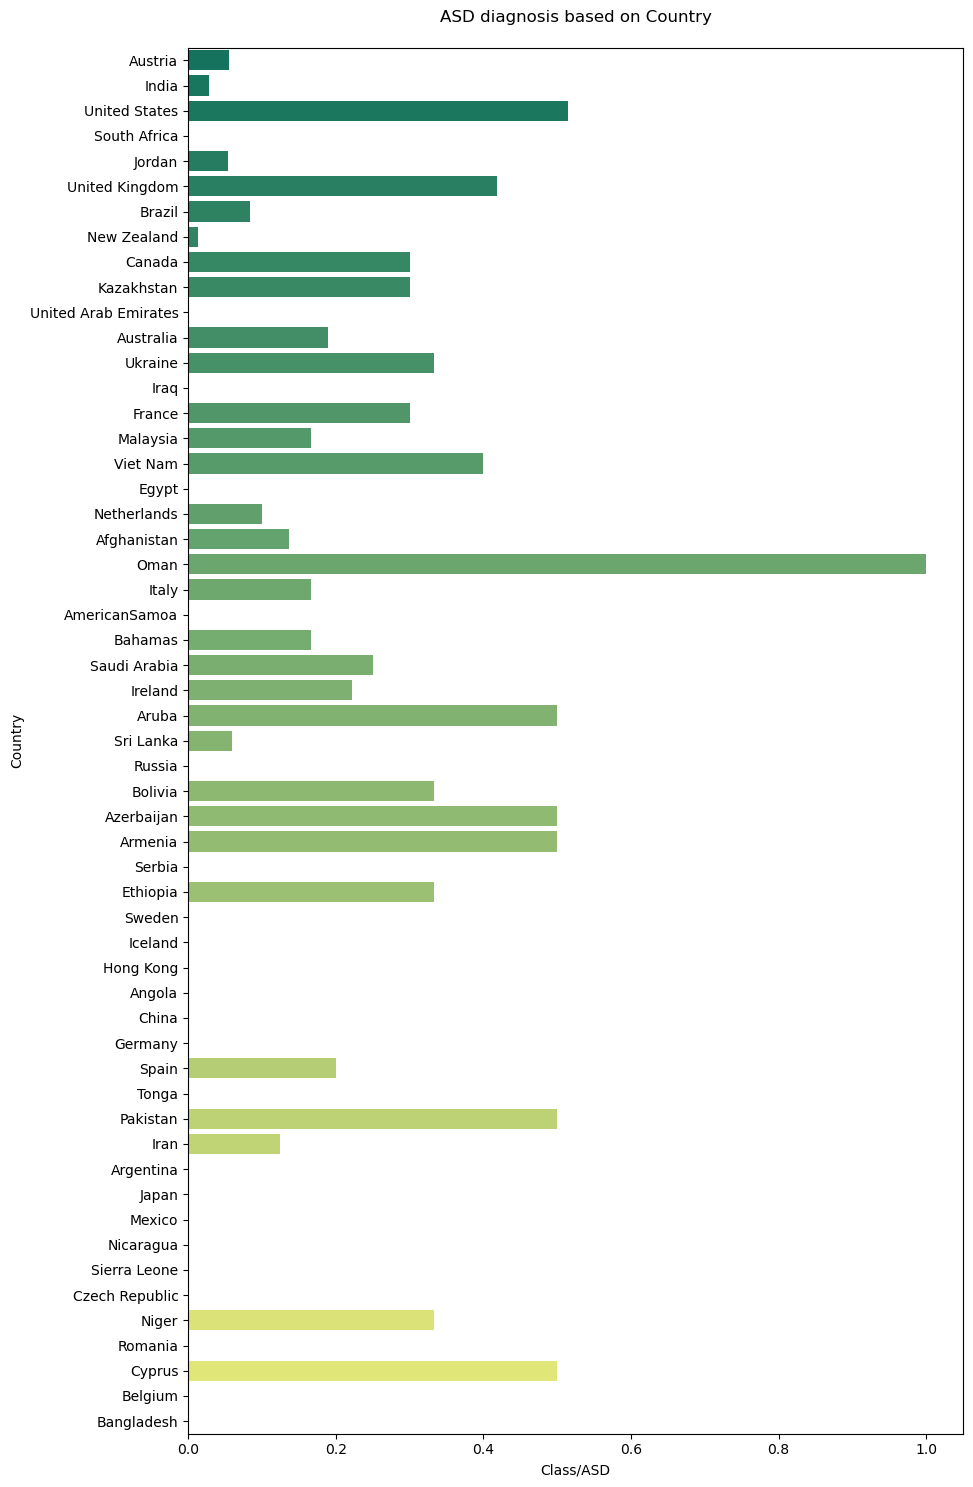

In [6]:
# ASD diagnosis based on country
fig, ax = plt.subplots(1,1, figsize = (10,18))
sns.barplot(x = df['Class/ASD'], y = df['Country_of_res'], palette = 'summer', errorbar = None, ax= ax)
ax.set_ylabel("Country")
plt.title("ASD diagnosis based on Country\n")
plt.show()

### Relation of Ethnicity with ASD

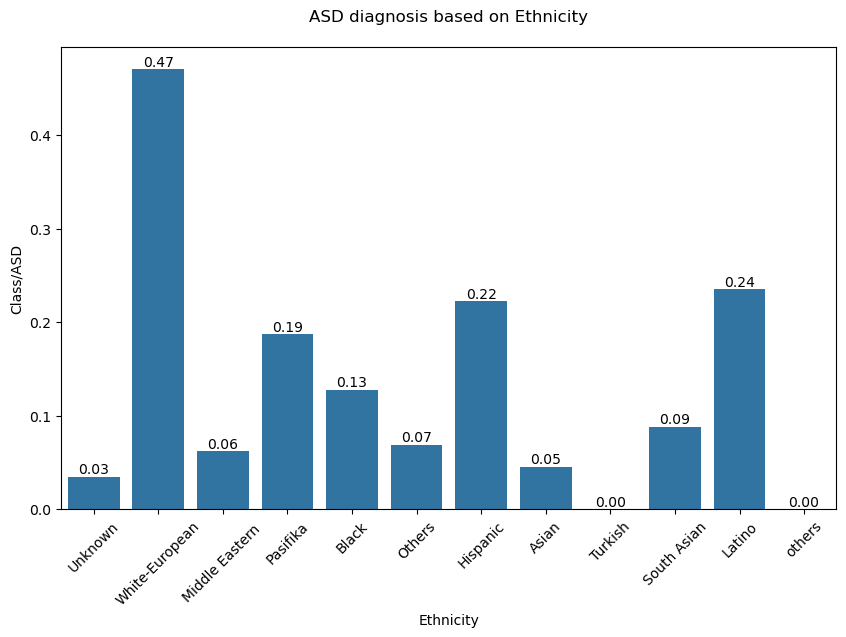

In [7]:
# ASD diagnosis based on Ethnicity
fig, ax = plt.subplots(1,1, figsize = (10,6))
sns.barplot(x = df['Ethnicity'], y = df['Class/ASD'], errorbar = None, ax = ax)

for cont in ax.containers:
    ax.bar_label(cont, fmt = "%.2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.title("ASD diagnosis based on Ethnicity\n")
plt.show()

### Correlation between AQ_Scores, Result and ASD diagnosis

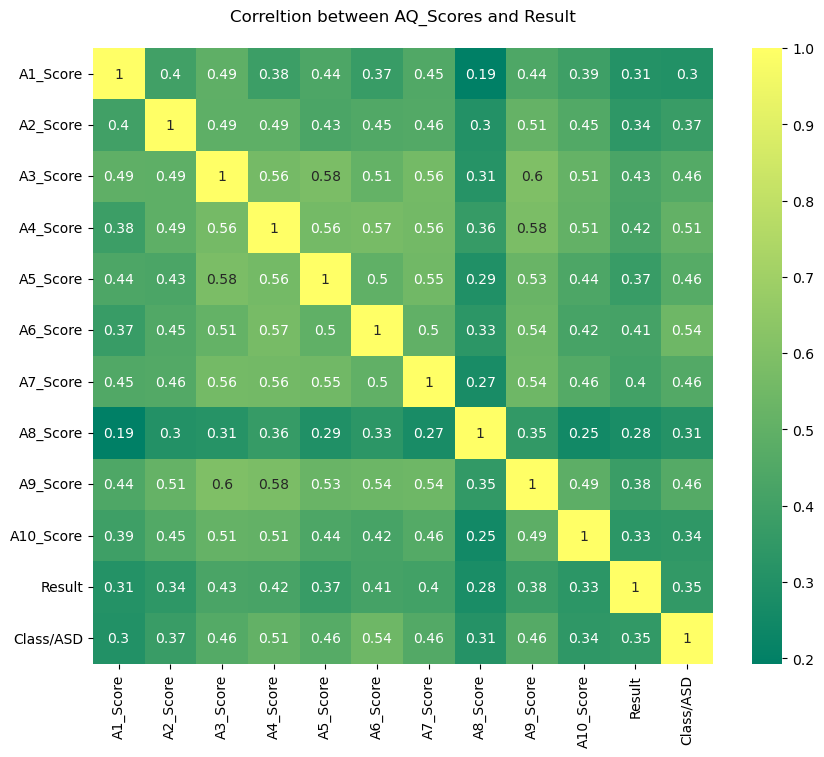

In [8]:
# Getting Correlation between AQ_Scores, Result and Class/ASD from whole dataframe
cor = df[[f'A{i}_Score' for i in range(1,11)] + ['Result'] + ['Class/ASD']].corr()

# Plotting correlation as heatmap
fig, ax = plt.subplots(1,1, figsize = (10,8))
sns.heatmap(cor, annot = True, cmap = 'summer', ax = ax)
plt.title("Correltion between AQ_Scores and Result\n")
plt.show()